# Multiple Regression

从0开始构建多元回归模型

https://www.youtube.com/watch?v=wm9yR1VspPs&t=8409s

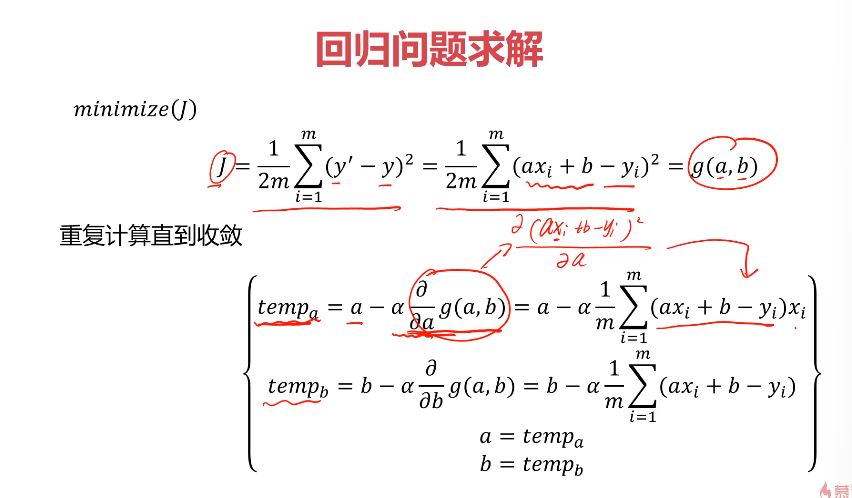

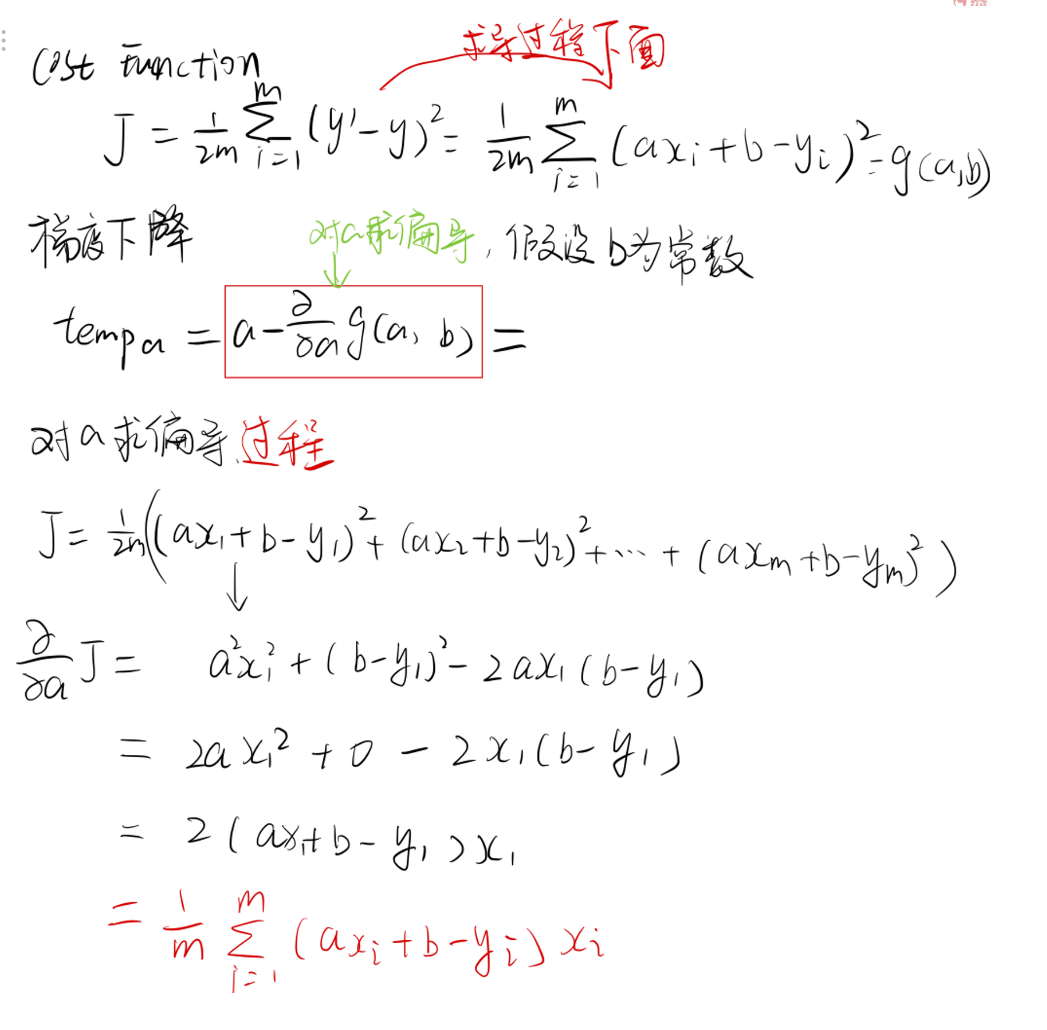

## Data Processing

In [2]:
# load data
import pandas as pd
data = pd.read_csv('Salary_Data2.csv')
data

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7
5,1.2,碩士以上,城市C,60.8
6,8.6,大學,城市C,50.1
7,6.9,碩士以上,城市A,70.3
8,4.2,大學,城市A,40.7
9,2.4,高中以下,城市A,28.1


In [3]:
# data preprocessing
# label encoding
# 将文字转换成数字
data['EducationLevel'] = data['EducationLevel'].map({"高中以下": 0, "大學": 1, "碩士以上": 2})
data

,YearsExperience,EducationLevel,City,Salary
0,3.0,1,城市A,45.9
1,7.8,2,城市C,80.5
2,2.3,0,城市A,25.2
3,5.1,0,城市A,30.4
4,10.0,2,城市B,65.7
5,1.2,2,城市C,60.8
6,8.6,1,城市C,50.1
7,6.9,2,城市A,70.3
8,4.2,1,城市A,40.7
9,2.4,0,城市A,28.1


In [4]:
## one-hot encoding
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(data[['City']])
city_encoded = onehot_encoder.transform(data[['City']]).toarray()
city_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [5]:
data[["CityA", "CityB", "CityC"]] = city_encoded
data

,YearsExperience,EducationLevel,City,Salary,CityA,CityB,CityC
0,3.0,1,城市A,45.9,1.0,0.0,0.0
1,7.8,2,城市C,80.5,0.0,0.0,1.0
2,2.3,0,城市A,25.2,1.0,0.0,0.0
3,5.1,0,城市A,30.4,1.0,0.0,0.0
4,10.0,2,城市B,65.7,0.0,1.0,0.0
5,1.2,2,城市C,60.8,0.0,0.0,1.0
6,8.6,1,城市C,50.1,0.0,0.0,1.0
7,6.9,2,城市A,70.3,1.0,0.0,0.0
8,4.2,1,城市A,40.7,1.0,0.0,0.0
9,2.4,0,城市A,28.1,1.0,0.0,0.0


In [6]:
data = data.drop(["City", "CityC"], axis=1)
data

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


In [88]:
from sklearn.model_selection import train_test_split
x = data[["YearsExperience", "EducationLevel", "CityA", "CityB"]]
y = data["Salary"] # 一维

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
print(y_train)

(28, 4)
(28,)
26    38.5
35    36.7
34    65.9
29    41.6
25    68.4
17    42.9
12    84.2
4     65.7
23    58.0
18    26.5
11    48.3
21    78.3
22    63.6
24    48.3
3     30.4
31    60.2
8     40.7
10    32.0
14    62.4
30    76.9
28    29.7
9     28.1
0     45.9
19    31.6
33    45.2
6     50.1
15    55.6
13    70.9
Name: Salary, dtype: float64


In [89]:
# split data to train and test
from sklearn.model_selection import train_test_split
x = data[["YearsExperience", "EducationLevel", "CityA", "CityB"]]
y = data["Salary"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
print(x_train.shape)
print(y_train.shape)
# to numpy matrix
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
print(y_train)


(28, 4)
(28,)
26    38.5
35    36.7
34    65.9
29    41.6
25    68.4
17    42.9
12    84.2
4     65.7
23    58.0
18    26.5
11    48.3
21    78.3
22    63.6
24    48.3
3     30.4
31    60.2
8     40.7
10    32.0
14    62.4
30    76.9
28    29.7
9     28.1
0     45.9
19    31.6
33    45.2
6     50.1
15    55.6
13    70.9
Name: Salary, dtype: float64


In [91]:
import numpy as np

w = np.array([1, 2, 3, 4])
b = 1
y_pred = (x_train*w).sum(axis=1) + b

In [92]:
((y_train - y_pred)**2).mean()

1772.9485714285713

In [93]:
def compute_cost(x, y, w, b):
    y_pred = (x * w).sum(axis=1) + b
    cost = ((y - y_pred) ** 2).mean()
    return cost

In [94]:
import numpy as np

w = np.array([0, 2, 2, 4])
b = 0
print(compute_cost(x_train, y_train, w, b))

2437.7371428571428


In [95]:
# numpy 的减法 
# 一行3列减去3行1列， 规则是这一行依次减去3行1列， 得到3行3列
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3]]).reshape(-1, 1)
print(a.shape)
print(b.shape)
print((a - b).shape)
print((a - b))

(3,)
(3, 1)
(3, 3)
[[ 0  1  2]
 [-1  0  1]
 [-2 -1  0]]


In [96]:
# 计算偏导数
# print(w.shape)
# print(x_train.shape)
y_pred = (x_train * w).sum(axis=1) + b
b_gradient = (y_pred - y_train).mean() # 这里不是求和，而是求平均

print((y_pred.shape))
print((y_train.shape))
print((y_pred - y_train).shape)

# w1 derviation = (x1 * (y_pred - y_train)).mean()
# x_train[:, 0]选取第一个特征
w1_gradient = (x_train[:, 0] * (y_pred - y_train))
print(w1_gradient.shape)

ValueError: Length of values (3) does not match length of index (28)

In [97]:
# 根据上面的公式，我们可以写出梯度下降的公式
def compute_gradient(x, y, w, b):
    y_pred = (x*w).sum(axis=1) + b
    # x的列数就是 特征数量， 依次求出在每个特征上的斜率（偏导数
    b_gradient = (y_pred - y).mean()
    w_gradient = np.zeros(x.shape[1])
    # 依次计算每个特征方向上的斜率
    for i in range(x.shape[1]):
        w_gradient[i] = (x[:, i] * (y_pred - y)).mean()
    
    return w_gradient, b_gradient

In [98]:
w = np.array([1, 2, 2, 4])
b = 1
compute_gradient(x_train, y_train, w, b)

(array([-2.49e+02, -5.67e+01, -1.69e+01, -6.59e+00]), -40.07142857142858)

In [99]:
# perform gradient descent
w = np.array([1, 2, 2, 4])
b = 1
learning_rate = 0.001
w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)
print(f'The cost is {compute_cost(x_train, y_train, w, b)}')
w = w - learning_rate * w_gradient
b = b - learning_rate * b_gradient
print(f'The cost after gradient descent is {compute_cost(x_train, y_train, w, b)}')
#  这里我们可以看到，每次迭代，cost都在减小，说明我们的梯度下降是有效的 

The cost is 1806.2914285714287
The cost after gradient descent is 1675.283646825475


In [100]:
np.set_printoptions(formatter={'float': '{: .2e}'.format})
# 用梯度下降法求解
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_func, gradient_func, run_iter, p_iter):
    c_hist = []
    w_hist = []
    b_hist = []

    w = w_init
    b = b_init

    for i in range(run_iter):
        w_gradient, b_gradient = gradient_func(x, y, w, b)
        w = w - learning_rate * w_gradient
        b = b - learning_rate * b_gradient
        cost = cost_func(x, y, w, b)
        
        c_hist.append(cost)
        w_hist.append(w)
        b_hist.append(b)

        if i % p_iter == 0:
            print(f'Iteration: {i:5}: Cost: {cost: .4e}, W: {w}, B: {b}, w_gradient: {w_gradient}, b_gradient: {b_gradient: .2e}')
    
    return w, b, c_hist, w_hist, b_hist

In [101]:
w_init = np.array([1, 2, 2, 4])
b_init = 0
learning_rate = 1.0e-2
run_iter = 20000

w_final, b_final, c_hist, w_hist, b_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter, 2000)

Iteration:     0: Cost:  7.9102e+02, W: [ 3.55e+00  2.58e+00  2.17e+00  4.07e+00], B: 0.41071428571428575, w_gradient: [-2.55e+02 -5.79e+01 -1.75e+01 -6.73e+00], b_gradient: -4.11e+01
Iteration:  2000: Cost:  2.8147e+01, W: [ 2.01e+00  2.02e+01  1.61e+00 -9.40e+00], B: 15.591768391647763, w_gradient: [ 5.16e-03  4.84e-02  1.93e-01  2.23e-01], b_gradient: -2.32e-01
Iteration:  4000: Cost:  2.5827e+01, W: [ 1.88e+00  1.95e+01 -8.09e-01 -1.14e+01], B: 18.873478352934214, w_gradient: [ 6.59e-03  2.44e-02  7.31e-02  2.58e-02], b_gradient: -1.14e-01
Iteration:  6000: Cost:  2.5406e+01, W: [ 1.77e+00  1.91e+01 -1.81e+00 -1.14e+01], B: 20.567728934742362, w_gradient: [ 4.63e-03  1.33e-02  3.37e-02 -7.99e-03], b_gradient: -6.16e-02
Iteration:  8000: Cost:  2.5283e+01, W: [ 1.69e+00  1.89e+01 -2.31e+00 -1.12e+01], B: 21.50314908348286, w_gradient: [ 2.86e-03  7.50e-03  1.76e-02 -9.73e-03], b_gradient: -3.47e-02
Iteration: 10000: Cost:  2.5242e+01, W: [ 1.65e+00  1.88e+01 -2.57e+00 -1.11e+01], B:

In [102]:
w_final, b_final

(array([ 1.59e+00,  1.87e+01, -2.90e+00, -1.08e+01]), 22.71217565670784)

In [104]:
# evaluate model
y_pred = (x_test * w_final).sum(axis=1) + b_final
pd.DataFrame({
    "y_pred": y_pred,
    "y_test": y_test
})

,y_pred,y_test
20,44.035273,43.8
16,67.463049,72.7
5,61.933200,60.8
27,23.788551,24.9
32,62.728463,56.3
2,23.470445,25.2
1,72.430675,80.5
7,68.099260,70.3


In [109]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = (x_train * w_final).sum(axis=1) + b_final
# print(y_train.shape)
# print(y_pred.shape)

mse_multi = mean_squared_error(y_train, y_pred)
r2_multi = r2_score(y_train, y_pred)
print(f'The MSE of the model is {mse_multi}, the R2 of the model is {r2_multi}')

The MSE of the model is 25.222007544105573, the R2 of the model is 0.9062698719057682


## Sklearn Model

In [111]:
# define X_multi and y
X_multi = data.drop(['Salary'], axis=1)
X_multi

,YearsExperience,EducationLevel,CityA,CityB
0,3.0,1,1.0,0.0
1,7.8,2,0.0,0.0
2,2.3,0,1.0,0.0
3,5.1,0,1.0,0.0
4,10.0,2,0.0,1.0
5,1.2,2,0.0,0.0
6,8.6,1,0.0,0.0
7,6.9,2,1.0,0.0
8,4.2,1,1.0,0.0
9,2.4,0,1.0,0.0


In [112]:
from sklearn.linear_model import LinearRegression

# set up the 2nd linear regression model
LR2 = LinearRegression()
# train the model
LR2.fit(x_train, y_train)

LinearRegression()

In [113]:
# make prediction
y_train_pred = LR2.predict(x_train)
print(y_train_pred)

[ 4.58e+01  4.53e+01  6.68e+01  4.42e+01  6.71e+01  4.61e+01  7.15e+01
  6.51e+01  6.29e+01  2.32e+01  4.47e+01  7.21e+01  6.51e+01  5.44e+01
  2.79e+01  6.51e+01  4.51e+01  2.82e+01  6.24e+01  7.18e+01  2.78e+01
  2.36e+01  4.32e+01  2.81e+01  5.41e+01  5.50e+01  5.47e+01  6.51e+01]


In [115]:
# evaluate the model
mse_multi = mean_squared_error(y_train, y_train_pred)
r2_multi = r2_score(y_train, y_train_pred)
print(f'The MSE of the model is {mse_multi}, the R2 of the model is {r2_multi}')

The MSE of the model is 25.221920906947386, the R2 of the model is 0.9062701938671316
